In [1]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.io as pio

plotly.offline.init_notebook_mode()

## Data Processing (dataframe)

In [2]:
def get_action_type(s):
    return s.split('-')[-2]

In [3]:
resultFName = 'results20190503'
result_mat_path = '../neura-sparse01/explore-v2/{}.csv'.format(resultFName)
summary_output_path = '../neura-sparse01/explore-v2/summary.csv'

df = pd.read_csv(result_mat_path)
df['type'] = df['name'].apply(lambda s: s.split('-')[-2])
df['subj'] = df['name'].apply(lambda s: s.split('-')[1])
n1 = lambda x, y: ['{}{}'.format(x, i) for i in y]
n2 = lambda x: n1(x, [1,2,3])

for s in ['RMSE', 'Std', 'Mean', 'CorrCoef']:
    if not s == 'CorrCoef':
        df['anklePos{}'.format(s)] = np.mean(df[n2('LTIO{}_'.format(s))+n2('RTIO{}_'.format(s))], axis=1)
        df['ankleLPos{}'.format(s)] = np.mean(df[n2('LTIO{}_'.format(s))], axis=1)
        df['ankleRPos{}'.format(s)] = np.mean(df[n2('RTIO{}_'.format(s))], axis=1)
        df['kneePos{}'.format(s)] = np.mean(df[n2('LFEO{}_'.format(s))+n2('RFEO{}_'.format(s))], axis=1)
    df['kneeOriY{}'.format(s)] = np.mean(df[['qLKNE{}_2'.format(s), 'qRKNE{}_2'.format(s)]], axis=1)
    df['kneeLOriY{}'.format(s)] = np.mean(df[['qLKNE{}_2'.format(s)]], axis=1)
    df['kneeROriY{}'.format(s)] = np.mean(df[['qRKNE{}_2'.format(s)]], axis=1)
    df['hipOri{}'.format(s)] = np.mean(df[n2('qLHIP{}_'.format(s))+n2('qRHIP{}_'.format(s))], axis=1)
    for k, v in [('X', '1'), ('Y', '2'), ('Z', '3')]:
        df['hipOri{}{}'.format(k, s)] = np.mean(df[['qLHIP{}_{}'.format(s, v), 'qRHIP{}_{}'.format(s, v)]], axis=1)
    
df_nos3 = df[df['subj']!='S03']

# vanilla df_results
df_result = df.groupby(['type', 'label']).mean()
df_result2 = df.groupby(['type', 'label']).std()

# df_results no s3
df_result_nos3 = df_nos3.groupby(['type', 'label']).mean()
df_result2_nos3 = df_nos3.groupby(['type', 'label']).std()

for meandf, stddf in [(df_result, df_result2), (df_result_nos3, df_result2_nos3)]:
    meandf['runtimeStd'] = stddf['runtime']
    meandf['dOriStd'] = stddf['dOri']
    meandf['dPosStd'] = stddf['dPos']
    meandf['dPosWStd'] = stddf['dPosW']
    for s in ['RMSE', 'Std', 'Mean', 'CorrCoef']:
        if not s == 'CorrCoef':
            for t in ['anklePos', 'ankleLPos', 'ankleRPos', 'kneePos']:
                meandf['{}{}Std'.format(t,s)] = stddf['{}{}'.format(t,s)]
        for t in ['kneeOriY', 'kneeLOriY', 'kneeROriY', 'hipOri', 'hipOriX', 'hipOriY', 'hipOriZ']:
            meandf['{}{}Std'.format(t,s)] = stddf['{}{}'.format(t,s)]

df_result.to_csv(summary_output_path)

In [4]:
df.to_csv('../neura-sparse01/explore-v2/{}-2.csv'.format(resultFName))

In [5]:
df_result.head()

posMeanRMSE  posMeanMean  \
type          label                                                          
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001     0.042344     0.003283   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002     0.036509     0.002922   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355     0.029271     0.000388   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000     0.002880     0.000151   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355     0.030639     0.001968   

                                                  oriMeanRMSE  oriMeanMean  \
type          label                                                          
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001    13.724108     0.118949   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002    12.935614    -0.268036   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355    11.557209    -2.314374   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000     4.332218     0.070175   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355     8.179022     0.861087   

                                                  MIDPELRMSE_1  MIDPELRMSE_2  \
type          label                                                            
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001           0.0           0.0   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002           0.0           0.0   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355           0.0           0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000           0.0           0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355           0.0           0.0   

                                                  MIDPELRMSE_3  MIDPELStd_1  \
type          label                                                           
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001           0.0          0.0   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002           0.0          0.0   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355           0.0          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000           0.0          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355           0.0          0.0   

                                                  MIDPELStd_2  MIDPELStd_3  \
type          label                                                          
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001          0.0          0.0   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002          0.0          0.0   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355          0.0          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000          0.0          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355          0.0          0.0   

                                                         ...          \
type          label                                      ...           
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001         ...           
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002         ...           
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355         ...           
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000         ...           
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355         ...           

                                                  hipOriXMeanStd  \
type          label                                                
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001        6.421231   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002        5.909529   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355        4.559941   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000        1.592927   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355        3.054222   

                                                  hipOriYMeanStd  \
type          label                                                
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001       10.130971   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002        9.449821   
              NS2+Aw__sOw__sIw__v+Sav03+

In [6]:
df_result_nos3.head()

posMeanRMSE  posMeanMean  \
type          label                                                          
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001     0.044424     0.003647   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002     0.038225     0.003296   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355     0.029932     0.000327   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000     0.002893     0.000155   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355     0.028891     0.001994   

                                                  oriMeanRMSE  oriMeanMean  \
type          label                                                          
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001    14.068129     0.266544   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002    13.232972    -0.156936   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355    11.722126    -2.283903   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000     4.255039     0.147194   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355     7.786115     0.680375   

                                                  MIDPELRMSE_1  MIDPELRMSE_2  \
type          label                                                            
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001           0.0           0.0   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002           0.0           0.0   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355           0.0           0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000           0.0           0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355           0.0           0.0   

                                                  MIDPELRMSE_3  MIDPELStd_1  \
type          label                                                           
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001           0.0          0.0   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002           0.0          0.0   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355           0.0          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000           0.0          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355           0.0          0.0   

                                                  MIDPELStd_2  MIDPELStd_3  \
type          label                                                          
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001          0.0          0.0   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002          0.0          0.0   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355          0.0          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000          0.0          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355          0.0          0.0   

                                                         ...          \
type          label                                      ...           
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001         ...           
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002         ...           
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355         ...           
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000         ...           
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355         ...           

                                                  hipOriXMeanStd  \
type          label                                                
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001        6.614935   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002        6.077882   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C355        4.652491   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C000        1.682467   
              NS2+Aw__vOw__vIw__v+Sav03+M00+C355        3.226021   

                                                  hipOriYMeanStd  \
type          label                                                
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C001       10.610948   
              NS2+Aw__sOw__sIw__v+Sav03+M76+C002        9.940590   
              NS2+Aw__sOw__sIw__v+Sav03+

## Graph Reports

In [7]:
def plot_results(df_result, traces_name, target, title='', showstd=True, ylabel='rmse (m)', imgsize=(100,100), fontsize=12, xTypes = [], fname=''):
    # target2 = target.replace('RMSE', '').replace('Mean', '').replace('CorrCoef', '')
    
    traces = []
    for k in traces_name:
        v = traces_name[k]
        idx = (df_result.index.get_level_values('label') == v)
        
        df_buf = df_result.iloc[idx].reset_index(level='label')
        if len(xTypes) == 0:
            xTypesKeys = df_buf['{}'.format(target)].index.get_level_values('type').values
            xTypesVals = xTypesKeys
        else:
            xTypesKeys = list(xTypes.keys())
            xTypesVals = list(xTypes.values())
        df_buf2 = df_buf.loc[xTypesKeys]
    
        trace = go.Bar(
            x=xTypesVals,
            y=df_buf2['{}'.format(target)].values,
            name=k,
            error_y=dict(
                type='data',
                array=df_buf2['{}Std'.format(target)].values,
                visible=showstd
            )
        )
        traces.append(trace)

    layout = go.Layout(
        title=title,
        xaxis=dict(),
        yaxis=dict(
            title=ylabel,
        ),
        height=imgsize[0],
        width=imgsize[1],
        margin=dict(l=80,r=10,b=0,t=10,pad=4),
        legend=dict(orientation="h", xanchor="center", x=0.5, y=-.2),
        font=dict(size=fontsize),
        barmode='group'
    )
    fig = go.Figure(data=traces, layout=layout)
    plotly.offline.iplot(fig, filename='{}-bar.html'.format(target))
    
    if not fname == '':
        pio.write_image(fig, fname)

In [8]:
def plot_results2(df_result, traces_name, targets, title='', showstd=True, ylabel='rmse (m)', imgsize=(100,100), fontsize=12, yrange=False, xTypes = [], fname=''):
    traces = []
    for k in traces_name:
        for l in targets:
            v = traces_name[k]
            target = targets[l]
            # target2 = target.replace('RMSE', '').replace('Mean', '').replace('CorrCoef', '')
            
            idx = (df_result.index.get_level_values('label') == v)

            df_buf = df_result.iloc[idx].reset_index(level='label')
            
            if len(xTypes) == 0:
                xTypesKeys = df_buf['{}'.format(target)].index.get_level_values('type').values
                xTypesVals = xTypesKeys
            else:
                xTypesKeys = list(xTypes.keys())
                xTypesVals = list(xTypes.values())
            df_buf2 = df_buf.loc[xTypesKeys]

            trace = go.Bar(
                x=xTypesVals,
                y=df_buf2['{}'.format(target)].values,
                name='{}{}'.format(k, l),
                error_y=dict(
                    type='data',
                    array=df_buf2['{}Std'.format(target)].values,
                    visible=showstd
                )
            )
            traces.append(trace)
            
    yDict = dict(title=ylabel)
    if yrange:
        yDict['range'] = yrange
        
    layout = go.Layout(
        title=title,
        xaxis=dict(),
        yaxis=yDict,
        height=imgsize[0],
        width=imgsize[1],
        margin=dict(l=80,r=10,b=0,t=10,pad=4),
        legend=dict(orientation="h", xanchor="center", x=0.5, y=-.2),
        font=dict(size=fontsize),
        barmode='group'
    )
    fig = go.Figure(data=traces, layout=layout)
    plotly.offline.iplot(fig, filename='{}-bar.html'.format(target))
    
    if not fname == '':
        pio.write_image(fig, fname)

## with respect the Vicon system

In [9]:
traces_name = {'vicon input (no cstr)': 'NS2+Aw__vOw__vIw__v+Sav03+M00+C000',
               'vicon input (cstr)': 'NS2+Aw__vOw__vIw__v+Sav03+M00+C355',
               'vs xsens': 'NS2+viconvsxsens',
               'KF lock knee1 (step clean)': 'NS2+Aw__sOw__sIw__v+Sav03+M76+C001',
               'KF lock knee2 (step clean)': 'NS2+Aw__sOw__sIw__v+Sav03+M76+C002',
               'CKF': 'NS2+Aw__sOw__sIw__v+Sav03+M76+C355'}
xTypes = ['Static', 'Walk', 'FigureofEight', 'Zigzag', 'Fivemin', 'Jog', 'JumpingJacks', 'SpeedSkater', 'HighKneeJog']

### ePos

In [10]:
plot_results(df_result, traces_name, 'dPos', title='', ylabel='meters', xTypes=xTypes)

### ankle position

In [11]:
plot_results(df_result, traces_name, 'anklePosRMSE', ylabel='mean error (m)', xTypes=xTypes)

In [12]:
plot_results(df_result, traces_name, 'anklePosMean', ylabel='mean error (m)', xTypes=xTypes)

### eOri

In [13]:
plot_results(df_result, traces_name, 'dOri', title='', ylabel='deg', xTypes=xTypes)

### knee angle (sagital plane only)

In [14]:
plot_results(df_result, traces_name, 'kneeOriYRMSE', ylabel='rmse (deg)', xTypes=xTypes)

In [15]:
plot_results(df_result, traces_name, 'kneeOriYMean', ylabel='mean error (deg)', xTypes=xTypes)

### hip orientation

In [16]:
plot_results(df_result, traces_name, 'hipOriRMSE', ylabel='rmse (deg)', xTypes=xTypes)

In [17]:
plot_results(df_result, traces_name, 'hipOriMean', ylabel='mean error (deg)', xTypes=xTypes)

In [48]:
for (a,b,c) in [(df, df_result, 'a'), (df_nos3, df_result_nos3, 'b')]:
    idx = [i in ['Walk', 'FigureofEight', 'Zigzag', 'Fivemin'] for i in a['type']]
    df_walk = a.iloc[idx].groupby(['label']).mean()
    df_walk2 = a.iloc[idx].groupby(['label']).std()
    df_walk['type'] = 'All walking'

    idx = [i in ['Static', 'Walk', 'FigureofEight', 'Zigzag', 'Fivemin'] for i in a['type']]
    df_nondyn = a.iloc[idx].groupby(['label']).mean()
    df_nondyn2 = a.iloc[idx].groupby(['label']).std()
    df_nondyn['type'] = 'All nondynamic'

    for meandf, stddf in [(df_walk, df_walk2), (df_nondyn, df_nondyn2)]:
        meandf['runtimeStd'] = stddf['runtime']
        meandf['dOriStd'] = stddf['dOri']
        meandf['dPosStd'] = stddf['dPos']
        for s in ['RMSE', 'Std', 'Mean', 'CorrCoef']:
            if not s == 'CorrCoef':
                for t in ['anklePos', 'ankleLPos', 'ankleRPos', 'kneePos']:
                    meandf['{}{}Std'.format(t,s)] = stddf['{}{}'.format(t,s)]
            for t in ['kneeOriY', 'kneeLOriY', 'kneeROriY', 'hipOri', 'hipOriX', 'hipOriY', 'hipOriZ']:
                meandf['{}{}Std'.format(t,s)] = stddf['{}{}'.format(t,s)]

    df_csv = pd.concat([b.reset_index(), df_walk.reset_index(), df_nondyn.reset_index()])
    inv_map = {v: k for k, v in traces_name.items()}
    df_csv['label'] = df_csv['label'].apply(lambda s: inv_map[s] if s in inv_map else s)
    df_csv.to_csv('../neura-sparse01/explore-v2/{}-3{}.csv'.format(resultFName, c))

C:\Users\z5151460\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




## Plot for the technical paper

In [11]:
traces_name = {'Vicon input': 'NS2+Aw__vOw__vIw__v+Sav03+M76+C355',
               'Xsens': 'NS2+viconvsxsens',
               'CKF': 'NS2+Aw__sOw__sIw__v+Sav03+M76+C355'}
xTypes = {'Static': 'Static', 'Walk': 'Walk', 'FigureofEight': 'Figure of Eight', 'Zigzag': 'Zigzag', 'Fivemin': 'Fivemin walk'}
df_tmp = df_result_nos3.copy()
df_tmp[['dPos', 'dPosW', 'dPosStd', 'dPosWStd']] = 100*df_tmp[['dPos', 'dPosW', 'dPosStd', 'dPosWStd']]

In [10]:
plot_results(df_tmp, traces_name, 'dPos', title='', ylabel='cm', xTypes=xTypes, 
             showstd=False, imgsize=(300,750), fontsize=24, fname='results-dposmean.png')

In [11]:
plot_results(df_tmp, traces_name, 'dOri', title='', ylabel='deg', xTypes=xTypes, 
             showstd=False, imgsize=(300,750), fontsize=24, fname='results-dorimean.png')

In [17]:
traces_name = {'Vicon input': 'NS2+Aw__vOw__vIw__v+Sav03+M76+C355',
               'CKF (not clean step)': 'NS2+Aw__sOw__sIw__v+Sav01+M76+C355'
               'CKF': 'NS2+Aw__sOw__sIw__v+Sav03+M76+C355'}
xTypes = {'Static': 'Static', 'Walk': 'Walk', 'FigureofEight': 'Figure of Eight', 'Zigzag': 'Zigzag', 'Fivemin': 'Fivemin walk'}
plot_results(df_tmp, traces_name, 'dPosW', title='', ylabel='cm', xTypes=xTypes, 
             showstd=False, imgsize=(300,750), fontsize=24, fname='results-dposwmean.png')

In [24]:
traces_name = {'': 'NS2+Aw__sOw__sIw__v+Sav03+M76+C355'}
targets = {'knee Y': 'kneeOriYRMSE', 'hip Y':'hipOriYRMSE', 
           'hip X':'hipOriXRMSE', 'hip Z':'hipOriZRMSE'}
plot_results2(df_tmp, traces_name, targets, ylabel='deg', xTypes=xTypes, 
              showstd=False, imgsize=(300,750), fontsize=24, fname='results-kneehiprmse.png')

In [22]:
traces_name = {'': 'NS2+Aw__sOw__sIw__v+Sav03+M76+C355'}
targets = {'knee Y': 'kneeOriYCorrCoef', 'hip Y':'hipOriYCorrCoef', 
           'hip X':'hipOriXCorrCoef', 'hip Z':'hipOriZCorrCoef'}
plot_results2(df_tmp, traces_name, targets, ylabel='CC', xTypes=xTypes, 
              showstd=False, imgsize=(300,750), fontsize=24, yrange=[0,1], fname='results-kneehipcc.png')

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
from matplotlib import rc
import pandas as pd
import numpy as np

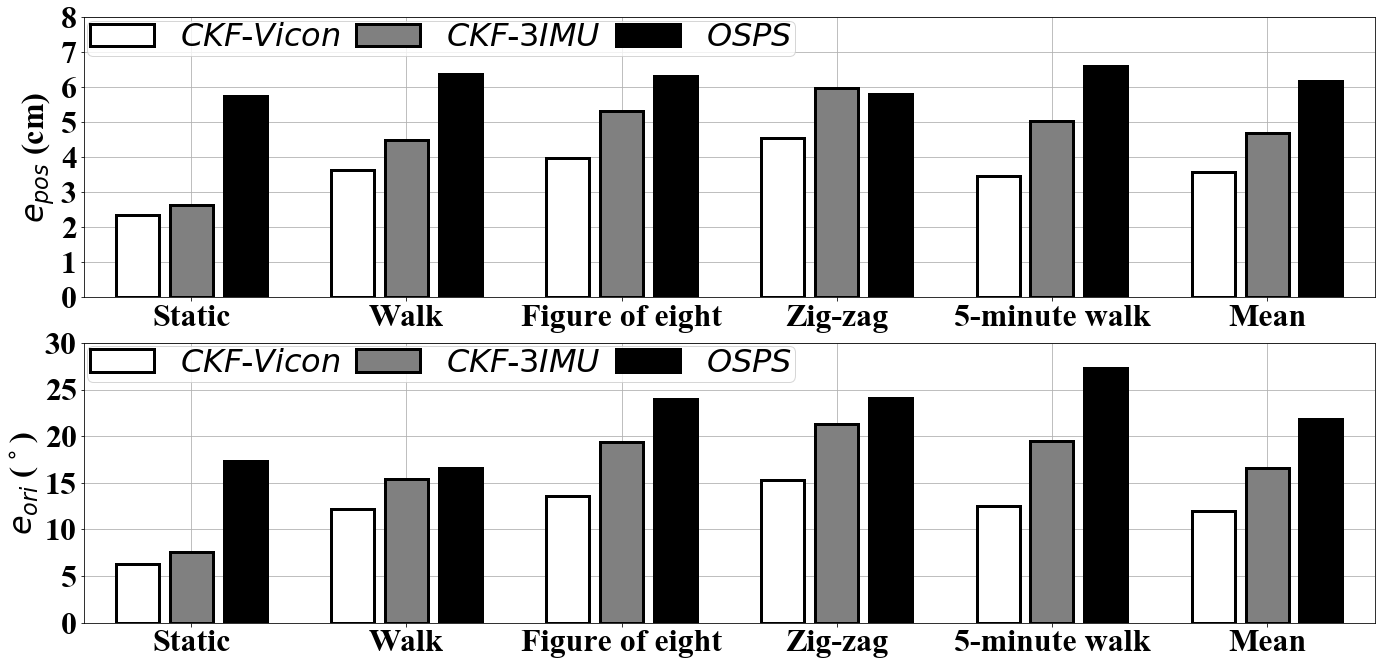

In [20]:
df = pd.read_csv("tech1-eposeori.csv")

plt.rc('text', usetex=False)
plt.rc('font', family='Times New Roman', size=32)
#matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))
x = np.arange(6)*4
width = 1

cList = ['white', 'gray', 'black']
lList = [r"$\it{CKF}$-$\it{Vicon}$", r"$\it{CKF}$-$\it{3IMU}$", r"$\it{OSPS}$"]
vList = ['Vicon', 'CKF', 'Xsens']
hList = ['', '', '']
for i in range(0,3):
    ax1.bar(x+(i-1)*width, df.loc[0:5,vList[i]], color=cList[i], 
            edgecolor='black', linewidth=3,
            hatch=hList[i], label=lList[i], zorder=3)
    ax2.bar(x+(i-1)*width, df.loc[6:11,vList[i]], color=cList[i], 
            edgecolor='black', linewidth=3,
            hatch=hList[i], label=lList[i], zorder=3)
ax1.set_xticks(x)
ax1.set_xticklabels( df.loc[0:5, 'x'] )
ax1.set_xlim([-2,22])
ax1.set_yticks(range(9))
ax1.set_ylabel(r'$e_{pos}$ (cm)')
ax1.grid(True, zorder=0)
ax1.legend(loc=2, ncol=3, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5)

ax2.set_xticks(x)
ax2.set_xticklabels( df.loc[6:11, 'x'] )
ax2.set_xlim([-2,22])
# ax2.set_xlabel('Types of Motion')
ax2.set_ylabel(r'$e_{ori}$ ($^\circ$)')
ax2.set_yticks(np.arange(0, 30.1, step=5))
ax2.grid(True, zorder=0)
ax2.legend(loc=2, ncol=3, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5)

fig.tight_layout(h_pad=0)
fig.savefig('results-dposdorimean-bw.png', dpi=300, transparent=False)

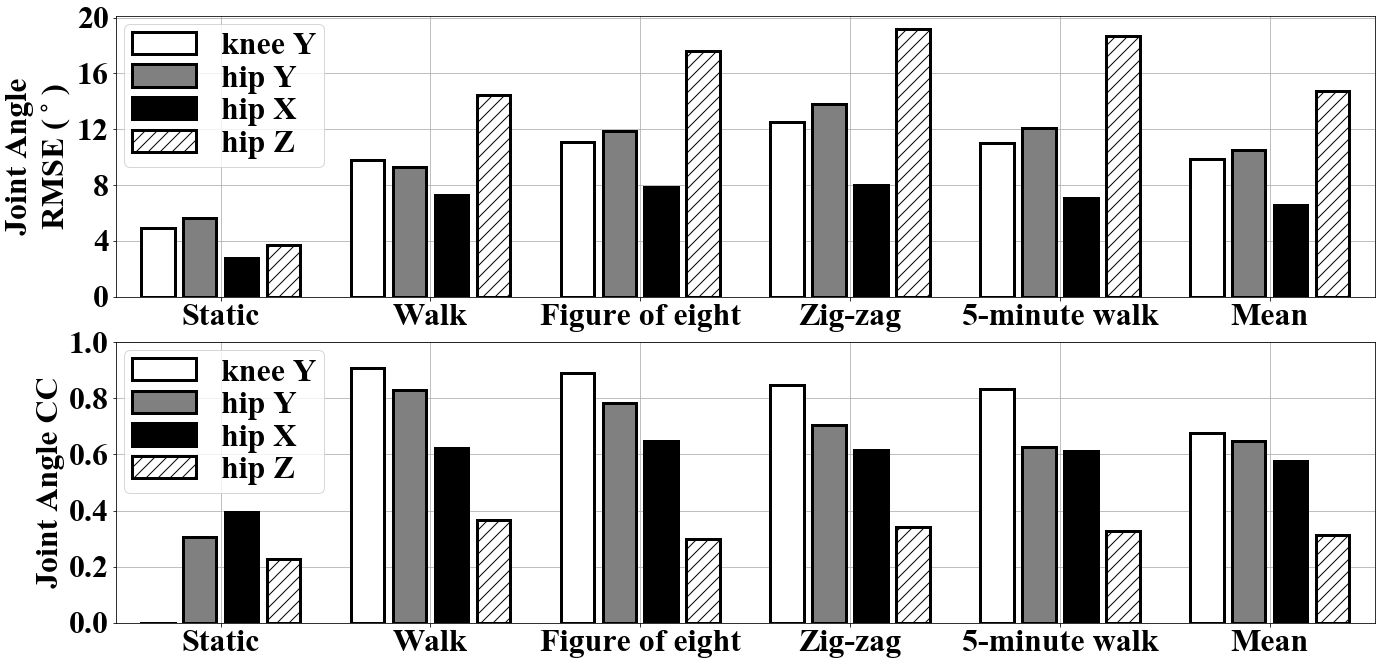

In [17]:
df = pd.read_csv("tech1-jointangles.csv")

#plt.rc('text', usetex=False)
plt.rc('font', family='Times New Roman', size=32)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))
x = np.arange(6)*5
width = 1

cList = ['white', 'gray', 'black', 'white']
vList = ['knee Y', 'hip Y', 'hip X', 'hip Z']
hList = ['', '', '', '//']
for i in range(0,4):
    ax1.bar(x+(i-1)*width, df.loc[0:5,vList[i]], color=cList[i], 
            edgecolor='black', linewidth=3,
            hatch=hList[i], label=vList[i], zorder=3)
    ax2.bar(x+(i-1)*width, df.loc[6:11,vList[i]], color=cList[i], 
            edgecolor='black', linewidth=3,
            hatch=hList[i], label=vList[i], zorder=3)
    
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels( df.loc[0:5, 'x'] )
ax1.set_xlim([-2,28])
ax1.set_yticks(range(0,21,4))
ax1.set_ylabel('Joint Angle\nRMSE ($^\circ$)')
ax1.grid(True, zorder=0)
ax1.legend(loc=2, ncol=1, borderpad=0.25, borderaxespad=0.25, labelspacing=0.1)

ax2.set_ylim([0, 1])
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels( df.loc[6:11, 'x'] )
ax2.set_xlim([-2,28])
# ax2.set_xlabel('Types of Motion')
ax2.set_yticks(np.arange(0, 1.01, step=0.2))
ax2.set_ylabel('Joint Angle CC')
ax2.grid(True, zorder=0)
ax2.legend(loc=2, ncol=1, borderpad=0.25, borderaxespad=0.25, labelspacing=0.1)

fig.tight_layout(h_pad=0)
fig.savefig('results-kneehiprmsecc-bw.png', dpi=300, transparent=False)

In [49]:
print(plt.rcParams["xtick.major.size"])

3.5


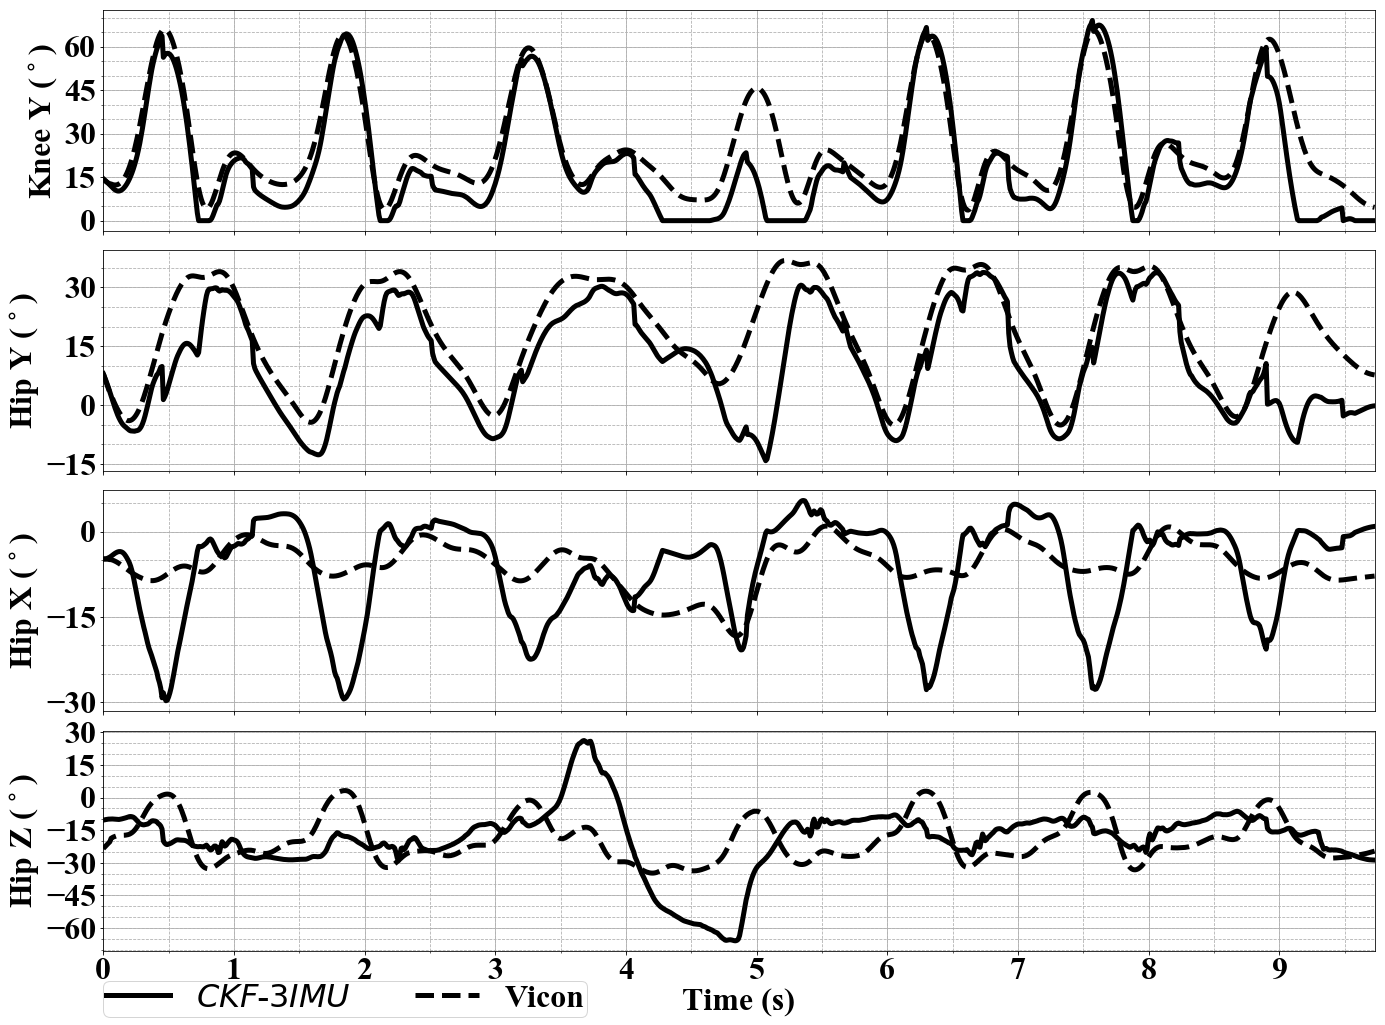

In [21]:
df = pd.read_csv("samplequalitative.csv")

plt.rc('font', family='Times New Roman', size=32)

fig, ax = plt.subplots(4, figsize=(20, 15))
width = 5

lList = ["Knee Y ($^\circ$)", "Hip Y ($^\circ$)", "Hip X ($^\circ$)", "Hip Z ($^\circ$)"]
vList = ['$\it{CKF}$-$\it{3IMU}$', 'Vicon']
hList = ['', '']
t = np.arange(df.shape[0])/100

for i in range(0,4):
    ax[i].plot(t, df.iloc[:,i], 'k-', linewidth=width, label=vList[0])
    ax[i].plot(t, df.iloc[:,4+i], 'k--', linewidth=width, label=vList[1])
    ax[i].set_ylabel(lList[i])
    ax[i].grid(True, which='major', linestyle='-', zorder=0)
    ax[i].grid(True, which='minor', linestyle='--')
    
    ax[i].xaxis.set_major_locator(plt.MultipleLocator(1))
    ax[i].xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    
    ax[i].yaxis.set_major_locator(plt.MultipleLocator(15))
    ax[i].yaxis.set_minor_locator(plt.MultipleLocator(5))
    
    if i!=3:
        ax[i].set_xticklabels([])
        
    ax[i].set_xlim([t[0], t[-1]])
    
    (ymin, ymax) = ax[i].get_ylim()
    # ax[i].setp(ax[3].get_xticklabels(), visible=False)
    #ax2.legend(loc=2, ncol=3, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5)
ax[-1].set_xlabel("Time (s)")
ax[-1].legend(bbox_to_anchor=(0., -0.3, 0., 0.0), loc='lower left',
           ncol=2, borderaxespad=0., borderpad=0.1, labelspacing=0.0)

fig.tight_layout(h_pad=0)
fig.savefig('results-kneehip-angle-viconsample6.png', dpi=300, transparent=False)